In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from PIL import Image
import os
import time
import subprocess
from sklearn.metrics import accuracy_score
import cv2
from matplotlib.pyplot import figure
import warnings 
warnings.filterwarnings('ignore')

In [14]:
def convert_to_pd(tabela):
    tabela = tabela[tabela.recognized]
    tabela['timestamp'] = pd.to_datetime(tabela.timestamp)
    tabela['drawing'] = tabela['drawing'].apply(json.loads)
    return tabela

def des(drawing):
    fig, ax = plt.subplots(figsize=(1.5, 1))
    for x,y in drawing:
        ax.plot(x, -np.array(y),'black')
    ax.axis('off')
    fig.canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    width = int(width)
    height = int(height)
    image = np.fromstring(fig.canvas.tostring_rgb(), dtype='uint8').reshape(height, width, 3)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).flatten()/255
    plt.show()
    plt.close(fig)
    return list(gray_image)

In [ ]:
airplane = pd.read_csv('csv/airplane.csv')
airplane = convert_to_pd(airplane)
airplane = limpa_tabela(airplane)

In [ ]:
a1 = airplane[:20000]
a1['array'] = a1['drawing'].apply(des)

In [ ]:
a2 = airplane[20000:40000]
a2['array'] = a2['drawing'].apply(des)

In [ ]:
a3 = airplane[40000:60000]
a3['array'] = a3['drawing'].apply(des)

In [ ]:
a4 = airplane[60000:80000]
a4['array'] = a4['drawing'].apply(des)

In [ ]:
a5 = airplane[80000:100000]
a5['array'] = a5['drawing'].apply(des)

In [ ]:
atot = pd.concat([a1,a2,a3,a4,a5])
writer = pd.ExcelWriter('xlsx/teste.xlsx', engine='xlsxwriter')
a1.to_excel(writer)
writer.save()

In [11]:
octopus = pd.read_csv('csv/octopus.csv')
octopus = convert_to_pd(octopus)

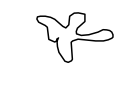

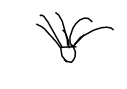

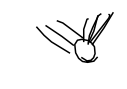

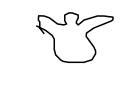

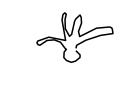

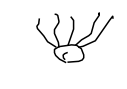

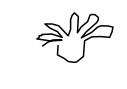

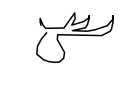

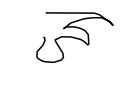

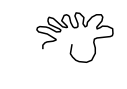

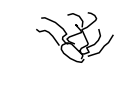

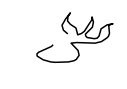

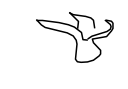

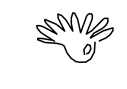

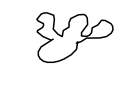

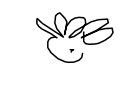

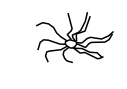

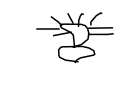

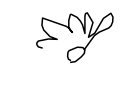

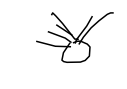

In [13]:
o1 = octopus[:20]
o1['array'] = o1['drawing'].apply(des)

In [5]:
flower = pd.read_csv('csv/flower.csv')
flower = convert_to_pd(flower)

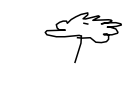

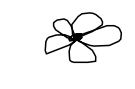

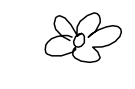

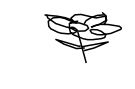

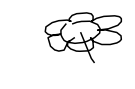

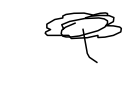

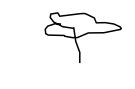

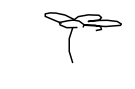

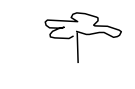

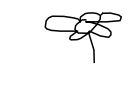

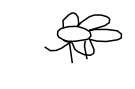

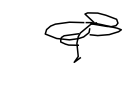

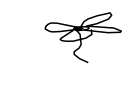

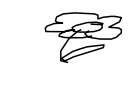

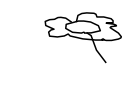

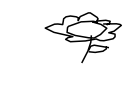

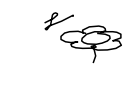

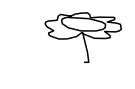

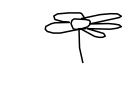

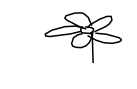

In [15]:
f1 = flower[:20]
f1['array'] = f1['drawing'].apply(des)

In [ ]:
f2=flower[20000:40000]
f2['array'] = f2['drawing'].apply(des)

In [ ]:
f3=flower[40000:60000]
f3['array'] = f3['drawing'].apply(des)

In [ ]:
f4=flower[60000:80000]
f4['array'] = f4['drawing'].apply(des)

In [ ]:
f5=flower[80000:100000]
f5['array'] = f5['drawing'].apply(des)

In [ ]:
ftot = pd.concat([f1,f2,f3,f4,f5])

In [ ]:
def lista(lista):
    return list(lista)
ftot.array = ftot.array.apply(lista)
ftot

In [ ]:
writer = pd.ExcelWriter('xlsx/flower100K.xlsx', engine='xlsxwriter')
ftot.to_excel(writer)
writer.save()

In [ ]:
flower = pd.read_csv('csv/flower.csv')
flower = convert_to_pd(flower)
flower_simp = flower[10000:100000]
flower_simp['array'] = flower_simp['drawing'].apply(des)

In [ ]:
helmet = pd.read_csv('csv/helmet.csv')
helmet = convert_to_pd(helmet)
helmet_simp = helmet[10000:100000]
helmet_simp['array'] = helmet_simp['drawing'].apply(des)

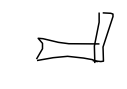

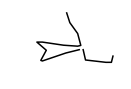

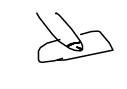

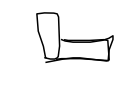

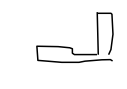

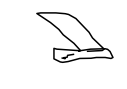

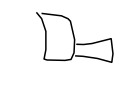

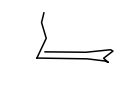

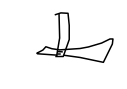

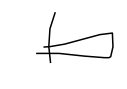

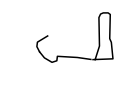

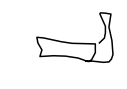

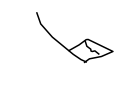

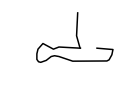

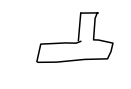

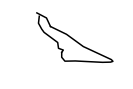

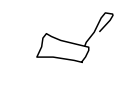

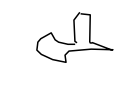

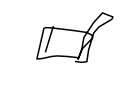

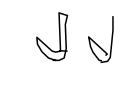

In [9]:
axe = pd.read_csv('csv/axe.csv')
axe = convert_to_pd(axe)
axe_simp = axe[:20]
axe_simp['array'] = axe_simp['drawing'].apply(des)

In [ ]:
submarine = pd.read_csv('csv/submarine.csv')
submarine = convert_to_pd(submarine)
submarine_simp = submarine[10000:100000]
submarine_simp['array'] = submarine_simp['drawing'].apply(des)

In [ ]:
key = pd.read_csv('csv/key.csv')
key = convert_to_pd(key)
key_simp = key[10000:100000]
key_simp['array'] = key_simp['drawing'].apply(des)

In [ ]:
clock = pd.read_csv('csv/clock.csv')
clock = convert_to_pd(clock)
clock_simp = clock[10000:100000]
clock_simp['array'] = clock_simp['drawing'].apply(des)

In [ ]:
cup = pd.read_csv('csv/cup.csv')
cup = convert_to_pd(cup)
cup_simp = cup[10000:100000]
cup_simp['array'] = cup_simp['drawing'].apply(des)

In [ ]:
mountain = pd.read_csv('csv/mountain.csv')
mountain = convert_to_pd(mountain)
mountain_simp = mountain[10000:100000]
mountain_simp['array'] = mountain_simp['drawing'].apply(des)

In [ ]:
#train = pd.concat([airplane_simp[:8000],octopus_simp[:8000],flower_simp[:2400],helmet_simp[:8000],axe_simp[:8000],
#submarine_simp[:8000],key_simp[:8000],clock_simp[:8000],cup_simp[:8000],mountain_simp[:8000]]).sample(frac=1)

#test = pd.concat([airplane_simp[8000:10000],octopus_simp[8000:10000],flower_simp[8000:10000],helmet_simp[8000:10000],
#axe_simp[8000:10000],submarine_simp[8000:10000],key_simp[8000:10000],clock_simp[8000:10000],cup_simp[8000:10000],
#mountain_simp[8000:10000]]).sample(frac=1)

total = pd.read_excel('xlsx/teste.xlsx')
total2 = pd.read_excel('xlsx/teste2.xlsx')

total = pd.concat([total,total2]).sample(frac=1)

def leitura(lista):
    return json.loads(lista+']')

total.array = total.array.apply(leitura)

train = total[:30]
test = total[30:40]

X_train = list(train['array'])
y_train = list(train['word'])

X_test = list(test['array'])
y_test = list(test['word'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.linear_model import SGDClassifier
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

sgd_clf = SGDClassifier(max_iter=12, tol=None, random_state=RANDOM_SEED) 
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.neural_network import MLPClassifier

neural = MLPClassifier() 
neural.fit(X_train, y_train)
y_pred = neural.predict(X_test)
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
nomes=['airplane','octopus','flower','helmet','axe','submarine','key','clock','cup','mountain']
tb = [airplane_simp,octopus_simp,flower_simp,helmet_simp,axe_simp,submarine_simp,key_simp,clock_simp,cup_simp,mountain_simp]
i=0
for nome in nomes:
    writer = pd.ExcelWriter('xlsx/{}10K.xlsx'.format(nome), engine='xlsxwriter')
    tb[i].to_excel(writer)
    writer.save()
    i+=1

In [ ]:
#for i in range(0,len(airplane_exemplo)):
#    img = Image.open('fotos/{}/{}{}.png'.format(nome,nome,i)).convert('L')
#    arr = np.array(img)

#    result = []
#    [result.extend(el) for el in arr/255]
#    airplane_exemplo['array'][i] = result